In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/advertising_ef.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1005.000000,998.000000,998.000000,1005.000000,1009.000000
mean,65.009463,35.962926,54958.573617,180.041920,0.501487
std,15.879997,8.772142,13381.286752,43.923438,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.300000,29.000000,46993.367500,138.870000,0.000000
50%,68.370000,35.000000,56998.245000,183.420000,1.000000
75%,78.570000,42.000000,65267.402500,218.800000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [7]:
le = LabelEncoder()
categorical_columns = ['City','Gender' ,'Country']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [9]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.950000,35.0,61833.90,256.09,953,0,215,0
1,65.009463,31.0,68441.85,193.77,895,1,147,0
2,69.470000,26.0,59785.94,236.50,112,0,184,0
3,74.150000,29.0,54806.18,245.89,931,1,103,0
4,68.370000,35.0,73889.99,225.58,799,0,96,0


In [10]:
# Splitting dataset
X = df.drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Multinomial Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [16]:
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9554455445544554


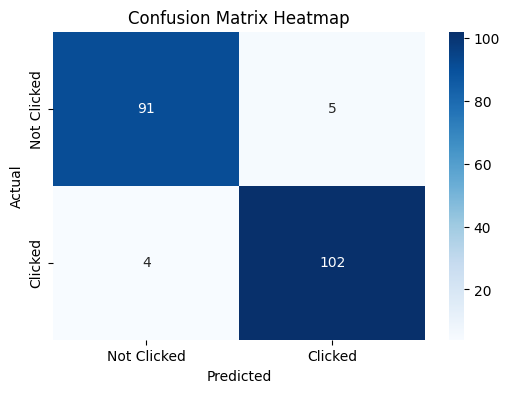

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Clicked", "Clicked"], yticklabels=["Not Clicked", "Clicked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()